### **YOLOv3-tiny image inference**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def get_detected_image(cv_net, image, confidence_threshold, nms_threshold, is_print=True):
  image_height = image.shape[0]
  image_width = image.shape[1]

  layer_names = cv_net.getLayerNames()
  out_layers = cv_net.getUnconnectedOutLayers()
  out_layers_names = [layer_names[i-1] for i in out_layers]

  cv_net.setInput(cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
  start = time.time()
  cv_out = cv_net.forward(out_layers_names)

  class_ids = []
  class_confidences = []
  boxes = []

  for idx_01, output in enumerate(cv_out):
    for idx_02, detection in enumerate(output):
      class_prob = detection[5:]
      class_id = np.argmax(class_prob)
      class_confidence = class_prob[class_id]
      if class_confidence > confidence_threshold:
        center_x = int(detection[0] * image_width)
        center_y = int(detection[1] * image_height)
        width = int(detection[2] * image_width)
        height = int(detection[3] * image_height)
        left = int(center_x - width/2)
        top = int(center_y - height/2)
        class_ids.append(class_id)
        class_confidences.append(class_confidence)
        boxes.append([left, top, width, height])

  results = cv2.dnn.NMSBoxes(boxes, class_confidences, confidence_threshold, nms_threshold)
  
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  if len(results) > 0:
      for i in results:
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        caption = (f'{labels_to_names_seq[class_ids[i]]} : {class_confidences[i]:.4f}')
        cv2.rectangle(draw_image, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
        cv2.putText(draw_image, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color=red_color, thickness=1)
        print(caption)
  
  if is_print:
    print(f'detection time : {round(time.time()-start, 2)}초')
  
  return draw_image

In [3]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                       11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                       21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                       31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                       41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                       51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                       61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                       71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush'}

In [ ]:
!mkdir ./data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

In [5]:
image = cv2.imread('./data/beatles01.jpg')
draw_image = image.copy()

In [6]:
!mkdir ./pretrained
!wget -O ./pretrained/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -O ./pretrained/yolov3-tiny.config https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true 

weights_path = './pretrained/yolov3-tiny.weights'
config_path =  './pretrained/yolov3-tiny.config'

cv_net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

--2022-08-12 20:49:41--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘./pretrained/yolov3-tiny.weights’

./pretrained/yolov3 100%[===================>]  33.79M  99.7MB/s    in 0.3s    

2022-08-12 20:49:42 (99.7 MB/s) - ‘./pretrained/yolov3-tiny.weights’ saved [35434956/35434956]

--2022-08-12 20:49:42--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg [following]
--2022-08-12 20:49:42--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg
Reusing existi

In [7]:
draw_img = get_detected_image(cv_net, image, confidence_threshold=0.5, nms_threshold=0.4, is_print=True)
data_dir = ('./drive/MyDrive/Colab Notebooks/update/dl_cv/5_dl_cv_yolo_inference/data/beatles03_output.jpg')
cv2.imwrite(data_dir, draw_image)

car : 0.7915
person : 0.7681
car : 0.6202
person : 0.5984
detection time : 0.28초


True

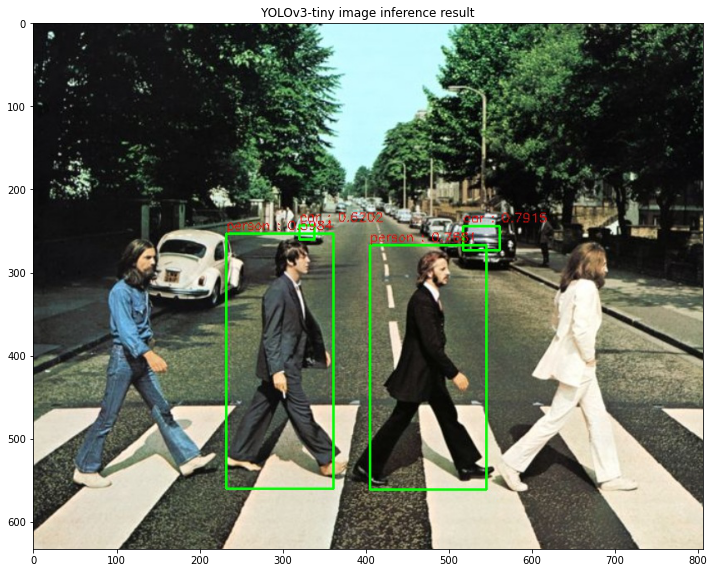

In [8]:
plt.figure(figsize=(12, 10))
image_output = plt.imread(data_dir)
plt.imshow(image_output)
plt.title('YOLOv3-tiny image inference result')
plt.show()